##Stroke Prediction based on medical data
###Data set taken from Kaggle.com

###Importing required libraries for KNN Classifier

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

###Importing the stroke dataset

In [41]:
data = pd.read_csv("data/stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Dropping null values

In [42]:
data = data.dropna()

###Extracting numeric columns

In [43]:
cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
x = data[cols]
y = data['stroke']

###Applying one-hot encoding to categorical columns

In [44]:
cols = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']
one_hot = pd.get_dummies(data[cols])
one_hot.describe

<bound method NDFrame.describe of       gender_Female  gender_Male  gender_Other  ever_married_No  \
0                 0            1             0                0   
2                 0            1             0                0   
3                 1            0             0                0   
4                 1            0             0                0   
5                 0            1             0                0   
...             ...          ...           ...              ...   
5104              1            0             0                1   
5106              1            0             0                0   
5107              1            0             0                0   
5108              0            1             0                0   
5109              1            0             0                0   

      ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0                    1                   0                       0   
2                    

In [45]:
x = pd.concat([x, one_hot], axis = 1)

In [46]:
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


###Train-Test split

In [61]:
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=seed)

In [62]:
print("Training shape: ", x_train.shape, y_train.shape)
print("Test shape: ", x_test.shape, y_test.shape)

Training shape:  (3927, 21) (3927,)
Test shape:  (982, 21) (982,)


###Scaling values using StandardScaler

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn.predict(x_test)

In [66]:
acc = knn.score(x_test, y_test)
print(acc)

0.945010183299389


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.40      0.04      0.07        53

    accuracy                           0.95       982
   macro avg       0.67      0.52      0.52       982
weighted avg       0.92      0.95      0.92       982



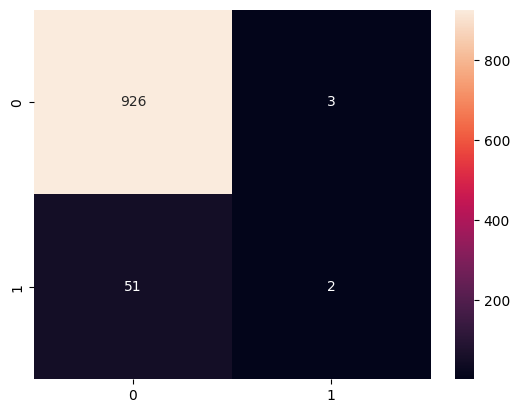

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
classes = ['0','1']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
sns.heatmap(cm, annot = True, fmt = 'd')

print(classification_report(y_test, y_pred))